In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
os.chdir('/Users/rraj/PythonFunctions/DCNet/')
os.getcwd()

'/Users/rraj/PythonFunctions/DCNet'

In [2]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from tqdm import tqdm

mnist_data = MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)


In [3]:
from initialization import Initializer
from layers import DiscriminationModule, ClassificationModule
from metrics import Conncetedness, Consistency

initializer = Initializer(mnist_data, num_classes=10)
metric1 = Conncetedness()
metric2 = Consistency(500)


In [8]:
precisions = []
recalls = []
consistencies = []
train_size = 5000
for interval in range(1,6):
    precision = []
    recall = []
    consistency = []
    data_loader = initializer.loader(train_size)
    
    organize_interval = 100*interval
    beta = 1 - (1/organize_interval)
    
    module_d = DiscriminationModule(500, initializer)
    module_c = ClassificationModule(500, 500, initializer)
    for i, x in tqdm(enumerate(data_loader), total=train_size, desc=str(organize_interval)):
        y_ = module_d(x)
        module_c(y_)
        
        if i > 0 and i % organize_interval == 0:
            module_d.organize()
            module_c.organize()
            
            metric1.update(module_c.connections, module_d.labels)
            metric2.update(module_d.labels)
            p, r = metric1.compute()
            precision.append(p)
            recall.append(r)
            consistency.append(metric2.compute())
    
    precisions.append(precision)
    recalls.append(recall)
    consistencies.append(consistency)
    metric1.reset()
    metric2.reset()

500: 100%|██████████| 5000/5000 [12:33<00:00,  6.63it/s]


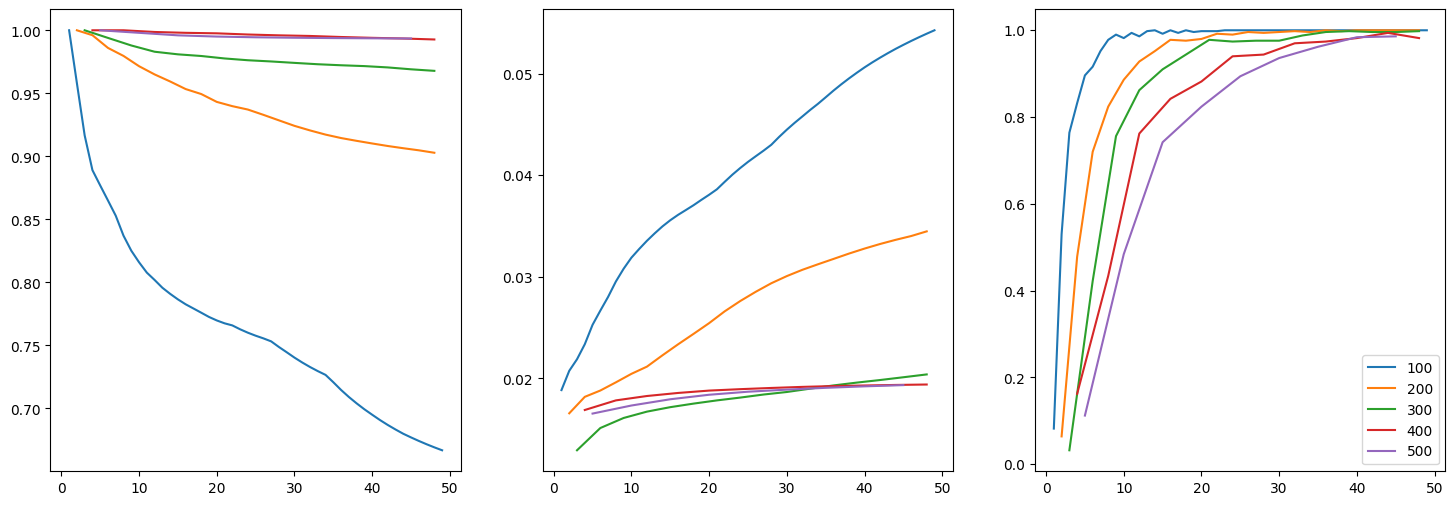

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i in range(5):
    x = [*range(i+1, 50, i+1)]
    ax[0].plot(x, precisions[i], label=str(100*(i+1)))
    ax[1].plot(x, recalls[i], label=str(100*(i+1)))
    ax[2].plot(x, consistencies[i], label=str(100*(i+1)))
plt.legend()